# MT Impedance Tensor, Apparent Resistivity and Pentration Depth

## FZ 2017-01-24

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[40,6]

In [2]:
#  !ls E:/Githubz/mtpy2/examples/data/edi_files/
!ls E:/Githubz/mtpy2/tests/data/edifiles/

15125A.edi
15126A.edi
15127A.edi
15128A.edi
15129A.edi
15130A.edi
16122A.edi
16123A.edi
16124A.edi
16125A.edi
16126A.edi
16127A.edi


INFO:root:module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
INFO:root:Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml
E:\Githubz\mtpy2\mtpy\analysis\zinvariants.py:227: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)
E:\Githubz\mtpy2\mtpy\imaging\mtplottools.py:820: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if edi_obj.Tipper.tipper == None:
E:\Githubz\mtpy2\mtpy\imaging\mtplottools.py:392: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._Z.freq == None:
E:\Githubz\mtpy2\mtpy\imaging\mtplottools.py:470: RuntimeWarning: invalid value encountered in double_scalars
  zdetvar = np.array([np.linalg.det(zzv) ** .5 for zzv in self._Z.z_err])


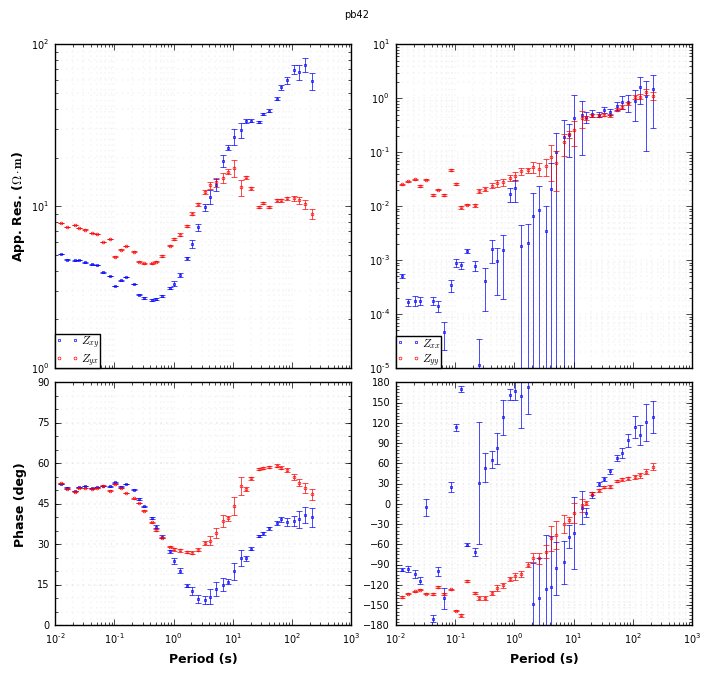

In [3]:
import mtpy.core.mt as mt

edifile="E:/Githubz/mtpy2/examples/data/edi_files/pb42c.edi"

#edifile="E:/Githubz/mtpy2/tests/data/edifiles/15126A.edi"


mt_obj = mt.MT(edifile)

#     :Plot MT response: ::

# plot all components of mt response and phase tensor
plot_obj = mt_obj.plot_mt_response(plot_num=2)  # plot_pt='y')     


In [4]:
# plot the tipper as well

# plot_obj.plot_tipper = 'yri'
# plot_obj.redraw_plot()

# Inside the mt_obj

In [5]:
# the attribute Z
zeta=mt_obj.Z

freqs=zeta.freq

# frequencies
freqs

array([  7.81250000e+01,   6.25000000e+01,   4.68750000e+01,
         3.90625000e+01,   3.12500000e+01,   2.34375000e+01,
         1.95312500e+01,   1.56250000e+01,   1.17187500e+01,
         9.76562500e+00,   7.81250000e+00,   6.25000000e+00,
         4.68750000e+00,   3.90625000e+00,   3.12500000e+00,
         2.34375000e+00,   1.95312500e+00,   1.56250000e+00,
         1.17187500e+00,   9.76563000e-01,   7.81250000e-01,
         5.85938000e-01,   4.88281000e-01,   3.90625000e-01,
         2.92969000e-01,   2.44141000e-01,   1.95313000e-01,
         1.46484000e-01,   1.22070000e-01,   9.76560000e-02,
         7.32420000e-02,   6.10350000e-02,   4.88280000e-02,
         3.66210000e-02,   3.05180000e-02,   2.44140000e-02,
         1.83110000e-02,   1.52590000e-02,   1.22070000e-02,
         9.15500000e-03,   7.62900000e-03,   6.10400000e-03,
         4.57800000e-03])

In [6]:
print (zeta.z.shape)  # the impendance tensor complex matrix
print (zeta.z_err.shape)

print (zeta.phase.shape) # The phase tensor matrix
print (zeta.phase_err.shape)

print (zeta.resistivity.shape)
print (zeta.resistivity_err.shape)


(43L, 2L, 2L)
(43L, 2L, 2L)
(43L, 2L, 2L)
(43L, 2L, 2L)
(43L, 2L, 2L)
(43L, 2L, 2L)


In [7]:
# show values
# zeta.z

zeta.z[:2,:,:]

array([[[ -5.72163600e-02 -0.4398077j,   2.73037200e+01+35.21485j  ],
        [ -3.37991700e+01-44.12561j  ,  -2.34125800e+00 -2.114556j ]],

       [[ -2.42039600e-02 -0.2271007j,   2.41034100e+01+29.73761j  ],
        [ -3.06816100e+01-37.31591j  ,  -2.05823100e+00 -2.20868j  ]]])

In [8]:
len(zeta.det)

2

In [9]:
len(zeta.det[0])

43

In [10]:
len(zeta.det[1])

43

In [11]:
zeta.resistivity[:2,:,:]  # first few 2X2 matrix

array([[[  5.03563584e-04,   5.08308169e+00],
        [  7.90900058e+00,   2.54792604e-02]],

       [[  1.66913791e-04,   4.68895943e+00],
        [  7.46828266e+00,   2.91666630e-02]]])

In [12]:
zeta.resistivity.shape

(43L, 2L, 2L)

# Penetration Depth

In [13]:
#The parameter  sqrt(1/(2 pi mu_0))

P_scale_meter =np.sqrt(1.0/(2.0*np.pi*4*np.pi*10**(-7)))

print(P_scale_meter)

#The parameter

# P_scale_meter=355.88127171

355.881271709


In [14]:

#The periods array

periods=1.0/freqs


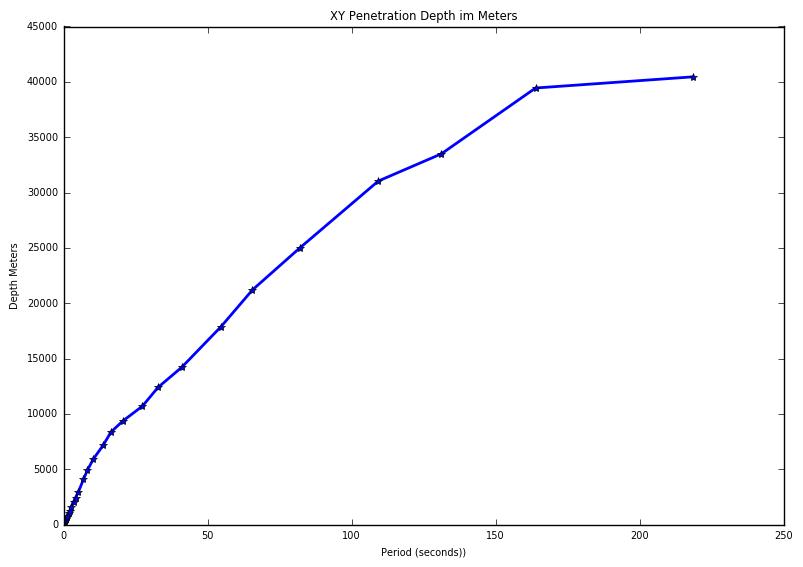

In [15]:
# One of the 4-components: XY
penetration_depth=P_scale_meter*np.sqrt(zeta.resistivity[:,0,1]*periods)

plt.plot(periods, penetration_depth, '-*')

plt.title("XY Penetration Depth im Meters")

plt.xlabel("Period (seconds))")

plt.ylabel("Depth Meters")

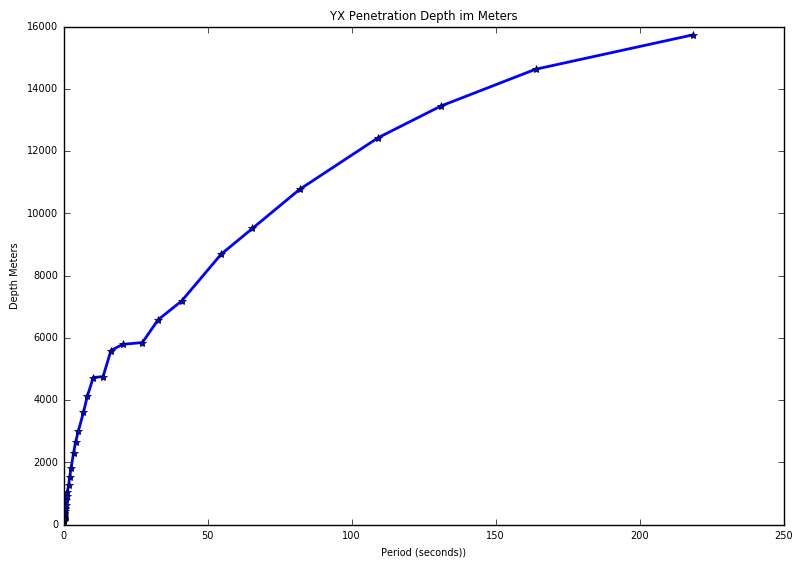

In [16]:
penetration_depth=P_scale_meter*np.sqrt(zeta.resistivity[:,1,0]*periods)

plt.plot(periods, penetration_depth, '-*')

plt.title("YX Penetration Depth im Meters")

plt.xlabel("Period (seconds))")

plt.ylabel("Depth Meters")

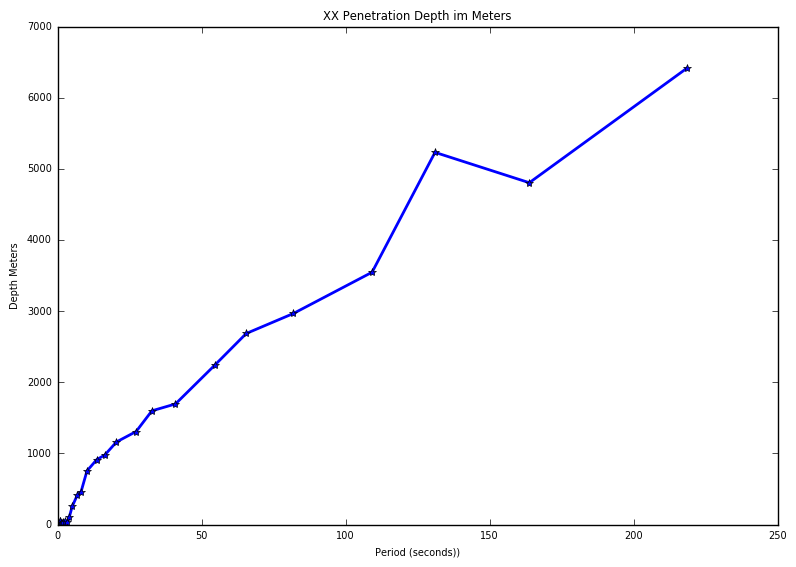

In [17]:
penetration_depth=P_scale_meter*np.sqrt(zeta.resistivity[:,0,0]*periods)

plt.plot(periods, penetration_depth, '-*')

plt.title("XX Penetration Depth im Meters")

plt.xlabel("Period (seconds))")

plt.ylabel("Depth Meters")

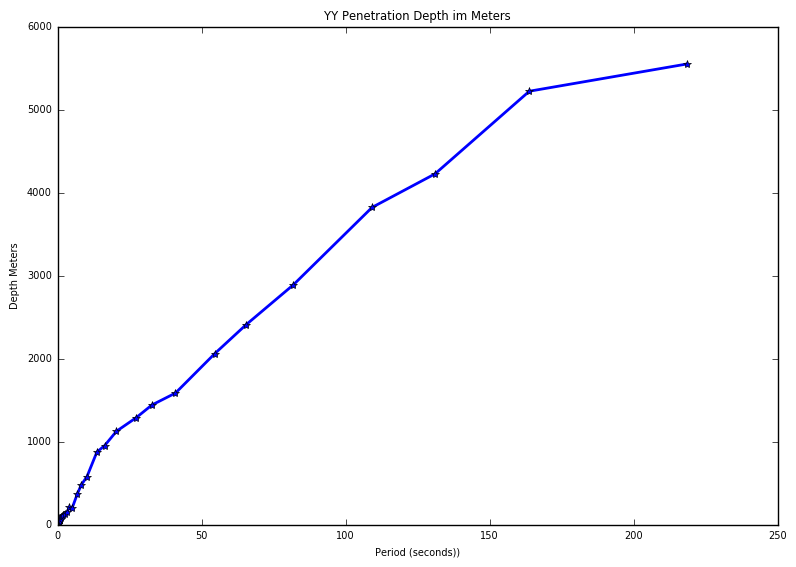

In [18]:
penetration_depth=P_scale_meter*np.sqrt(zeta.resistivity[:,1,1]*periods)

plt.plot(periods, penetration_depth, '-*')

plt.title("YY Penetration Depth im Meters")

plt.xlabel("Period (seconds))")

plt.ylabel("Depth Meters")

## Average of XY and YX components as Apparent Resistivity

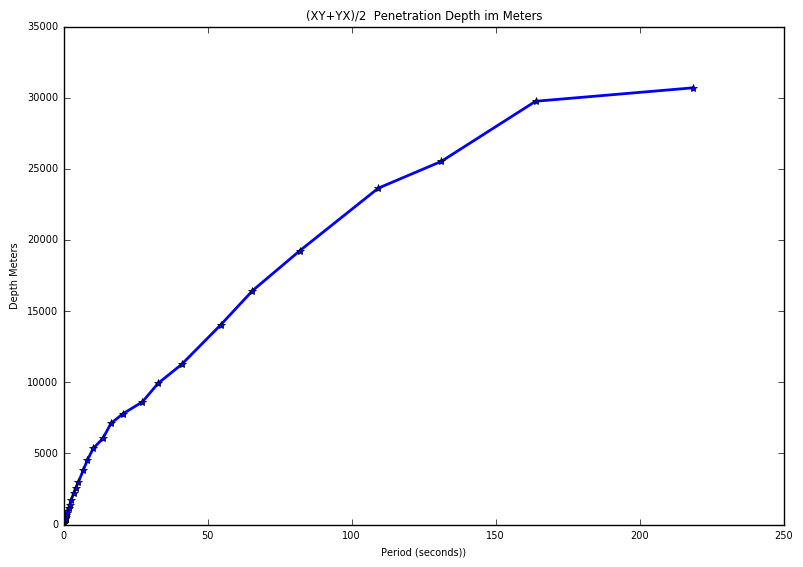

In [19]:

#1 Apparent Resistivtity as (Zxy+Zyx)/2
apparent_resistivity_0 = (zeta.resistivity[:,0,1]+ zeta.resistivity[:,1,0])/2

penetration_depth=P_scale_meter*np.sqrt(apparent_resistivity_0*periods)

plt.plot(periods, penetration_depth, '-*')

plt.title("(XY+YX)/2  Penetration Depth im Meters")

plt.xlabel("Period (seconds))")

plt.ylabel("Depth Meters")


# Test use the module mtpy.analysis.niblettbostick 

In [20]:
import mtpy.analysis.niblettbostick as nibbos

In [21]:
 for i, per in enumerate(periods):
    print per
    
    dep01=P_scale_meter*np.sqrt(zeta.resistivity[i][0,1]*per)
    dep10=P_scale_meter*np.sqrt(zeta.resistivity[i][1,0]*per)
    
    te_rho, te_depth = nibbos.rhophi2rhodepth(zeta.resistivity[i][0, 1], zeta.phase[i][0, 1], per)
    tm_rho, tm_depth = nibbos.rhophi2rhodepth(zeta.resistivity[i][1, 0], zeta.phase[i][1, 0], per)

#     print(te_rho, te_depth)
#     print(tm_rho, tm_depth)

    print(dep01, te_depth)  # check if they are the smae value?
    print(dep10, tm_depth)
    

0.0128
(90.776547957626988, 90.776547957626988)
(113.23245470685619, 113.23245470685617)
0.016
(97.47727115430412, 97.477271154304134)
(123.01993650701564, 123.01993650701564)
0.0213333333333
(111.86402549639025, 111.86402549639025)
(143.79749963694857, 143.79749963694857)
0.0256
(123.20036186950148, 123.20036186950149)
(154.32885519047832, 154.32885519047832)
0.032
(135.02085476907899, 135.02085476907899)
(170.6427093897083, 170.6427093897083)
0.0426666666667
(153.7718918182326, 153.7718918182326)
(192.39385304008579, 192.39385304008582)
0.0512
(167.56499397000877, 167.5649939700088)
(208.66281568833256, 208.66281568833256)
0.064
(177.87480438901005, 177.87480438901005)
(220.61860323537087, 220.61860323537087)
0.0853333333333
(199.9967214530069, 199.99672145300687)
(260.31190616863165, 260.31190616863165)
0.1024
(204.27259395267512, 204.27259395267512)
(251.94682964936874, 251.94682964936874)
0.128
(237.83724953292938, 237.83724953292938)
(295.7523521329004, 295.7523521329004)
0.16
(2

In [22]:
nibbos.calculate_znb(z_array=zeta.z, periods=periods)

Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
1
18
2
18
3
18
4
18
5
18
6
18
7
18
8
18
9
18
10
18
11
18
12
18
13
18
14
18
15
18
16
18
17
18


AttributeError: 'module' object has no attribute 'rotate_z'